In [10]:
import numpy as np
from skimage import io
import glob
from skimage import measure
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
volume = io.imread('data/x-ray/40kV_DR_reslice_180deg_ROI_8bits_z300z550.tif')
seg = io.imread('data/x-ray/40kV_DR_reslice_180deg_ROI_8bits_z300z550_cp_masks_cutOff.tif')

print('volume shape: ', volume.shape)
print('masks shape: ', seg.shape)

volume shape:  (251, 650, 1414)
masks shape:  (251, 650, 1414)


In [6]:
properties = ['centroid', 'major_axis_length', 'minor_axis_length', 
              'mean_intensity', 'min_intensity', 'max_intensity', 
              'area', 'moments', 'bbox']

In [7]:
regionprops = measure.regionprops_table(seg, volume, properties)

In [12]:
df_region = pd.DataFrame.from_dict(regionprops)

In [41]:
min_int = df_region['min_intensity']
max_int = df_region['max_intensity']
min_axis = df_region['minor_axis_length']
max_axis = df_region['major_axis_length']
areas = df_region['area']

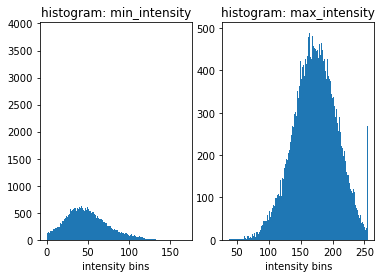

In [39]:
min_bins = np.unique(min_int.values)
max_bins = np.unique(max_int.values)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(min_int.values, bins = min_bins) 
ax1.set_title("histogram: min_intensity")
ax1.set_xlabel('intensity bins')

ax2.hist(max_int.values, bins = max_bins) 
ax2.set_title("histogram: max_intensity")
ax2.set_xlabel('intensity bins')

plt.show()

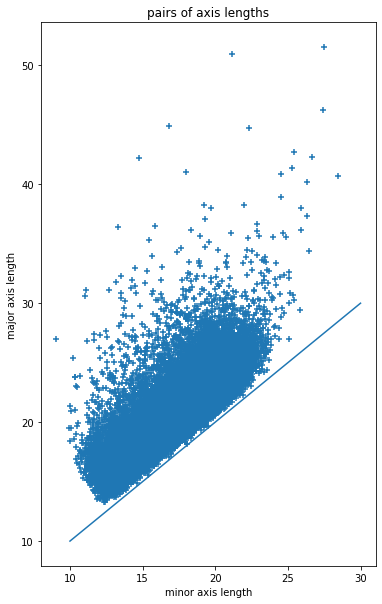

In [34]:
x = min_axis.values
y = max_axis.values
line = np.linspace(10,30,1000)
fig = plt.figure(figsize=(6,10))
plt.title('pairs of axis lengths')
plt.xlabel('minor axis length')
plt.ylabel('major axis length')
plt.scatter(x, y, marker='+')
# identity line for orientation
plt.plot(line, line)
plt.show()

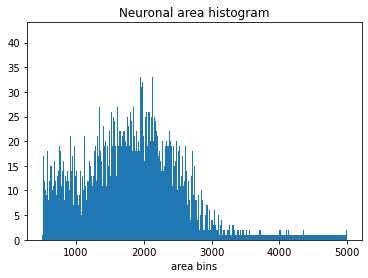

In [43]:
area_bins = np.unique(areas.values)

fig = plt.figure()
plt.hist(areas.values, bins= area_bins)
plt.title('histogram of cell sizes')
plt.xlabel('area bins')
plt.show()